# LSTM Time Series - Stock Price Prediction
## Part 2 - Data Preprocessing
In this notebook, we load the filtered data set file containing the historical prices of Google stocks for the last five years and preprocess it.

> **INPUT**: The filtered data set file of the last five years stock prices for Google, as filtered in the previous phase. <br/>
> **OUTPUT**: The preprocessed and transformed data, split into training, validation, and testing subsets, and stored in an intermediary location for the training phase.

### 1. INITIALIZATION

In [1]:
# Import necessary libraries and modules
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set output width
pd.set_option("display.width", 120)

### 2. LOADING DATASET

In [3]:
# Prepare data file location and name
data_file_location = "..//data//interim//"
data_file_name = "google_stock_price_recent"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [4]:
# Check loaded data shape
data.shape

(1323, 7)

In [5]:
# Check loaded data head
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.828499,52.616001,50.785500,52.292500,52.292500,30652000
1,2019-01-03,52.049999,52.848999,50.703499,50.803001,50.803001,36822000
2,2019-01-04,51.629501,53.542000,51.370899,53.535500,53.535500,41878000
3,2019-01-07,53.575001,53.700001,52.737999,53.419498,53.419498,39638000
4,2019-01-08,53.805500,54.228001,53.026501,53.813999,53.813999,35298000


In [6]:
# Check columns types
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### 3. DATA PREPROCESSING

#### Validate Data Types

In [7]:
# Convert date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Check column types
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Select Independent Features

The objective of this analysis is to implement a multi-variant prediction, taking into account possible impact of several independent features such as the Open price, Close price and Volume on future stock price performance.

For this reason, we will consider in this analysis all available variables: 
- Opening price
- Highest price
- Lowest price
- Closing price
- Adjusted closing price
- Trading volume

These features will be used to predict the future closing price.

In [8]:
# Define selected features and target attribute
features = ["Open", "High", "Low",	"Close", "Adj Close", "Volume"]
target = "Open"

#### Split Data into Train, Validation, and Test

In order to track and validate the performance of our model, we will divide the available dataset of recent stock prices into three parts: training, validation, and testing sets.

The split will be as follows:
- **Training dataset:** covering the period from the start of 2019 to the end of 2023.
- **Validation dataset:** representing the stock prices of the first month of 2024.
- **Testing dataset:** representing the stock prices of the second month of 2024.

In [9]:
# Define start and end time for each period
train_end_date = pd.to_datetime("2023-12-31")
validate_start_date = pd.to_datetime("2024-01-01")
validate_end_date = pd.to_datetime("2024-01-31")
test_start_date = pd.to_datetime("2024-02-01")
test_end_date = pd.to_datetime("2024-02-29")

# Split dataset into training, validation, and testing
data_train = data[data["Date"] <= train_end_date][features]
data_train_dates = data[data["Date"] <= train_end_date]["Date"]
data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]
data_test = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
data_test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]

In [10]:
# Display the shape of each dataset
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (1258, 6)
Validation Set: (21, 6)
Testing Set: (20, 6)


In [11]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

Training Dataset:
        Open       High        Low      Close  Adj Close    Volume
0  50.828499  52.616001  50.785500  52.292500  52.292500  30652000
1  52.049999  52.848999  50.703499  50.803001  50.803001  36822000
2  51.629501  53.542000  51.370899  53.535500  53.535500  41878000
3  53.575001  53.700001  52.737999  53.419498  53.419498  39638000
4  53.805500  54.228001  53.026501  53.813999  53.813999  35298000
Validation Dataset:
            Open        High         Low       Close   Adj Close    Volume
1258  139.600006  140.615005  137.740005  139.559998  139.559998  20071900
1259  138.600006  141.089996  138.429993  140.360001  140.360001  18974300
1260  139.850006  140.634995  138.009995  138.039993  138.039993  18253300
1261  138.352005  138.809998  136.850006  137.389999  137.389999  15433200
1262  138.000000  140.639999  137.880005  140.529999  140.529999  17645300
Testing Dataset:
            Open        High         Low       Close   Adj Close    Volume
1279  143.690002  

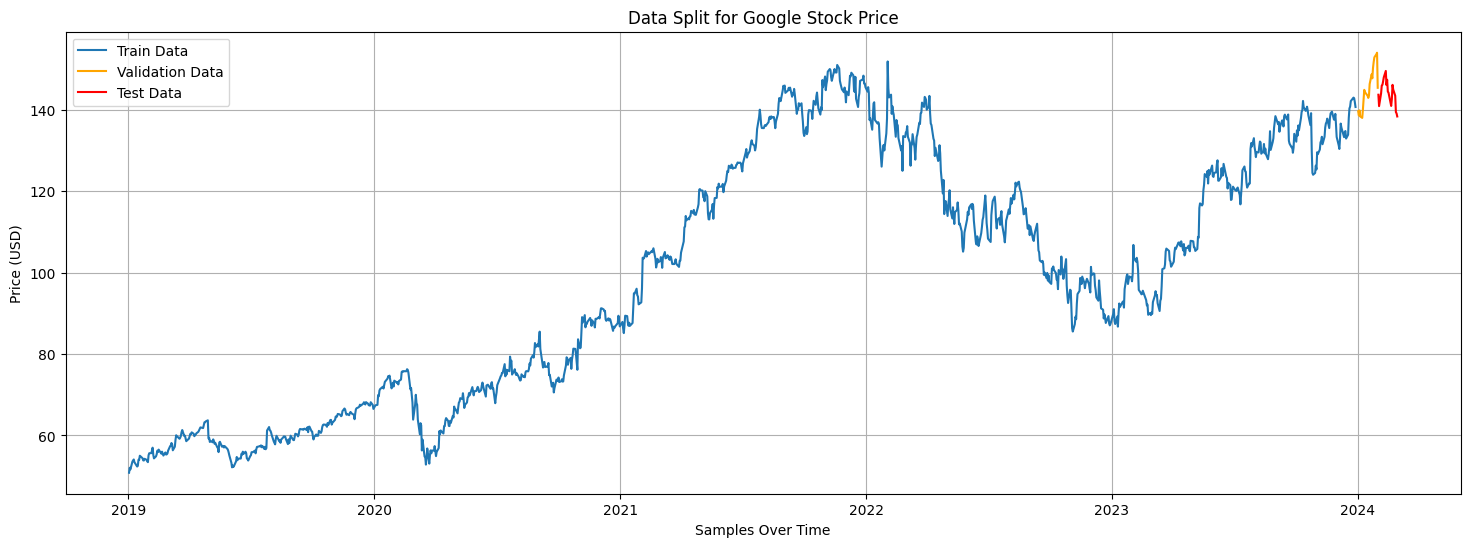

In [12]:
# Plot the stock price for each of the data splits
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"])
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="red")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Google Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.grid()

#### Data Scaling

In [13]:
# Check the distribution of input features
data[features].describe()

,Open,High,Low,Close,Adj Close,Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,100.882880,102.042442,99.853834,100.974635,100.974635,2.882756e+07
std,31.078299,31.360869,30.780336,31.059813,31.059813,1.268332e+07
min,50.828499,52.374500,50.676800,50.803001,50.803001,6.936000e+06
25%,71.211247,71.905250,70.356251,70.992001,70.992001,2.076335e+07
50%,102.825996,103.927498,101.500000,102.751503,102.751503,2.575600e+07
75%,130.778503,132.021675,129.389999,130.440002,130.440002,3.287305e+07
max,155.080002,157.000000,154.132004,156.500000,156.500000,1.241400e+08


Looking at these details, it's noticeable and anticipated that all price values have similar distributions given they log the price fluctuation on daily basis.

Nevertheless, the trading volume represents a different aspect and it has a completely distinct distribution. 

Accordingly, input features need to be transformed into a unified scale and since the distribution doesn't indicate any outliers, we will use the [0,1] range to represent all features.

To avoid data leakage, we fit the scaler to the training data only and then use this scaler to transform training, validation and testing datasets. 

In [14]:
# Initialize scaler with range [0,1]
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform training dataset
data_train_scaled = sc.fit_transform(data_train)

# Transform validating and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

### 4. CONSTRUCTING DATA STRUCTURE

Since we are dealing with a time series problem with multiple predictors, we need to construct the input data and reshape it to fit into the LSTM model.

This requires specifying a sliding time window (sequence size) that defines the total number of previous observations to predict the next value.

In this experiment, we consider a sequence size of 60 prior samples (financial days) to predict the opening price in the next day.

In [15]:
# Define a method to construct the input data X and Y
def construct_lstm_data(data, sequence_size, target_attr_idx):
    """
    Construct input data (X) and target data (y) for LSTM model from a pandas DataFrame.

    Parameters:
    -----------
    data : pandas.DataFrame
        Input data DataFrame of shape (n_samples, n_features).
    
    sequence_size : int
        Number of previous time steps to use as input features for predicting the next time step.
    
    target_attr_idx : int
        Index of column in `data` DataFrame that corresponds to target attribute that LSTM model will predict.

    Returns:
    --------
    data_X : numpy.ndarray
        Array of LSTM input sequences of shape (n_samples - sequence_size, sequence_size, n_features).

    data_y : numpy.ndarray
        Corresponding target values for each input sequence of shape (n_samples - sequence_size,).
    """
    
    # Initialize constructed data variables
    data_X = []
    data_y = []
    
    # Iterate over the dataset
    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i,0:data.shape[1]])
        data_y.append(data[i,target_attr_idx])
        
    # Return constructed variables
    return np.array(data_X), np.array(data_y)

The construction function is currently available for constructing subsets for training, validation, and testing date that is aligned with the LSTM model input.

In [16]:
# Define the sequence size
sequence_size = 60

# Construct training data
X_train, y_train = construct_lstm_data(data_train_scaled, sequence_size, 0)

Because creating input data requires observations from previous samples, constructing subsets for the validation and testing periods suggests we append data from previous periods.

For instance, to predict the initial stock price in the validation period, we must combine recent actual stock prices (sequence) from the training period. This step is crucial for providing the LSTM model with the expected sequence.

Same principle applies to stock performance during the testing phase but in this case (and depending on the sequence size), we may need to combine samples from both validation and testing subsets.

To facilitate this step, we combine the whole scaled dataset together and then select corresponding chunks before constructing the input data sets.

In [17]:
# Combine scaled datasets together
data_all_scaled = np.concatenate([data_train_scaled, data_validate_scaled, data_test_scaled], axis=0)
print(f"Data Scaled Shape: {data_all_scaled.shape}")

# Calculate each data length
train_size = len(data_train)
validate_size = len(data_validate)
test_size = len(data_test)

# Construct validation dataset
X_validate, y_validate = construct_lstm_data(data_all_scaled[train_size-sequence_size:train_size+validate_size,:], sequence_size, 0)

# Construct testing dataset
X_test, y_test = construct_lstm_data(data_all_scaled[-(test_size+sequence_size):,:], sequence_size, 0)

Data Scaled Shape: (1299, 6)


In [18]:
# Check original data and data splits shapes
print(f"Full Scaled Data: {data_all_scaled.shape}")
print(f"\n Data Train Scaled: {data_train_scaled.shape}")
print(f"> Data Train X: {X_train.shape}")
print(f"> Data Train y: {y_train.shape}")

print(f"\n Data Validate Scaled: {data_validate_scaled.shape}")
print(f"> Data Validate X: {X_validate.shape}")
print(f"> Data Validate y: {y_validate.shape}")

print(f"\n Data Test Scaled: {data_test_scaled.shape}")
print(f"> Data Test X: {X_test.shape}")
print(f"> Data Test y: {y_test.shape}")

Full Scaled Data: (1299, 6)

 Data Train Scaled: (1258, 6)
> Data Train X: (1198, 60, 6)
> Data Train y: (1198,)

 Data Validate Scaled: (21, 6)
> Data Validate X: (21, 60, 6)
> Data Validate y: (21,)

 Data Test Scaled: (20, 6)
> Data Test X: (20, 60, 6)
> Data Test y: (20,)
